In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,root_mean_squared_error,mean_squared_error
from sklearn.pipeline import Pipeline

In [2]:
df=pd.read_csv("customersatisfaction_copy.csv")
df.head()

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365


In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
df.head()

,Customer Satisfaction,Incentive
0,-1.282447,1.010513
1,0.425298,2.281043
2,1.953070,4.415053
3,2.625838,10.563600
4,-1.426333,0.627365


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Satisfaction  100 non-null    float64
 1   Incentive              100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


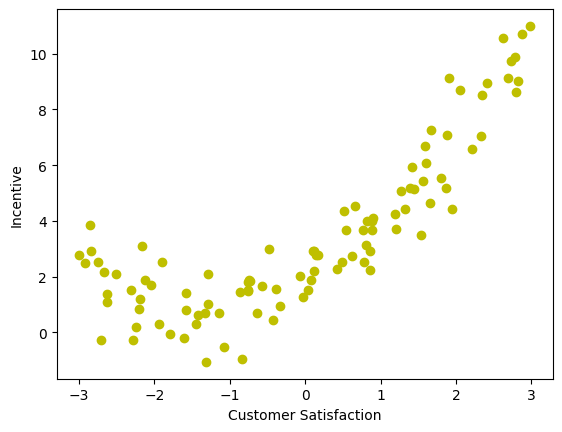

In [6]:
plt.scatter(df["Customer Satisfaction"],df["Incentive"],color="y")
plt.xlabel("Customer Satisfaction")
plt.ylabel("Incentive")
plt.show()

In [7]:
X=df[["Customer Satisfaction"]]
y=df["Incentive"]

In [8]:
X.head()

,Customer Satisfaction
0,-1.282447
1,0.425298
2,1.953070
3,2.625838
4,-1.426333


In [9]:
y.head()

0     1.010513
1     2.281043
2     4.415053
3    10.563600
4     0.627365
Name: Incentive, dtype: float64

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)

In [35]:
scaler=StandardScaler()

In [36]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [37]:
regression=LinearRegression()

In [38]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
y_pred=regression.predict(X_test)

In [40]:
score=r2_score(y_test,y_pred)
score

0.2705652535622243

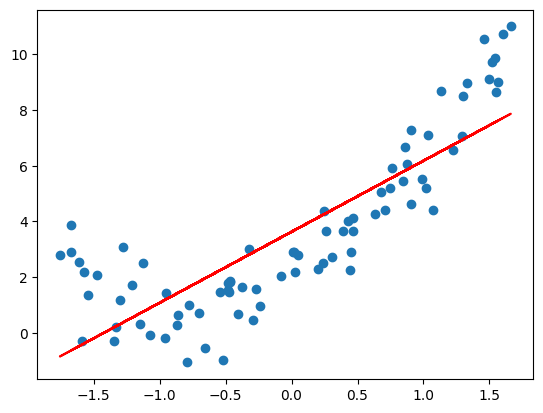

In [41]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color="r")
plt.show()

In [42]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [43]:
poly=PolynomialFeatures(degree=2,include_bias=True)

In [44]:
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [45]:
regression=LinearRegression()
regression.fit(X_train_poly,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [46]:
y_pred=regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
score

0.7685687698788558

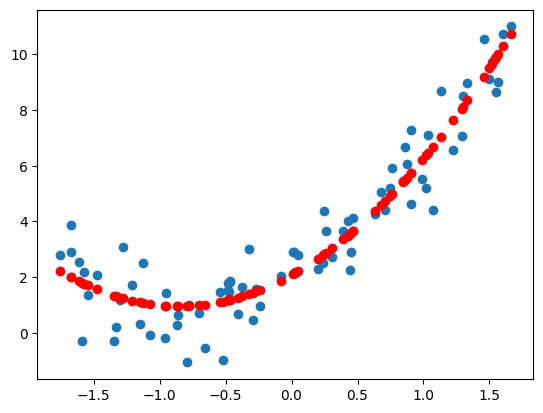

In [47]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,regression.predict(X_train_poly),color="r")
plt.show()

In [48]:
poly=PolynomialFeatures(degree=3,include_bias=True) 
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [49]:
regression=LinearRegression()
regression.fit(X_train_poly,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
y_pred=regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
score

0.7573443621401051

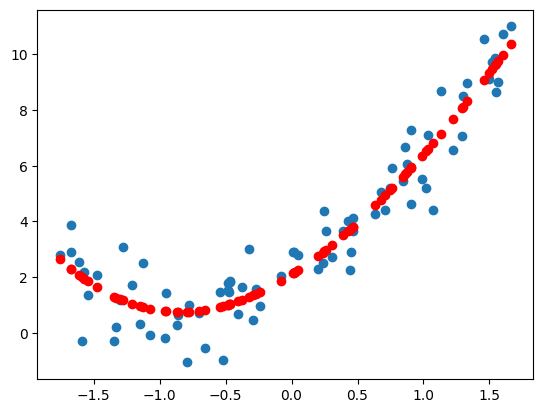

In [52]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,regression.predict(X_train_poly),color="r")
plt.show()

In [58]:
def poly_regression(degree):
    poly_features=PolynomialFeatures(degree=degree)
    lin_reg=LinearRegression()
    scaler=StandardScaler()
    pipeline=Pipeline([
        ("standard_scaler",scaler),
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    pipeline.fit(X_train,y_train)
    score=pipeline.score(X_test,y_test)
    print("R2 score: ",score)

    

In [59]:
poly_regression(2)

R2 score:  0.7685687698788558


In [60]:
for degree in [1,2,3,4,5,6,7,8,9,10]:
    poly_regression(degree)

R2 score:  0.27056525356222416
R2 score:  0.7685687698788558
R2 score:  0.7573443621401051
R2 score:  0.7355034443260418
R2 score:  0.73512441650954
R2 score:  0.7343590482133431
R2 score:  0.7347819263549459
R2 score:  0.7411422099998386
R2 score:  0.7310763879815907
R2 score:  0.7280578621232862
